In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [2]:
%pwd

'/aiffel/aiffel/camera_sticker'

In [3]:
## 내 얼굴 가져오기

my_image_path = "./images/seowoo.jpg"  #상대경로

In [4]:
my_image_tmp = '/aiffel/aiffel/camera_sticker/images/seowoo.jpg' #절대경로

In [5]:
img_bgr = cv2.imread(my_image_tmp)

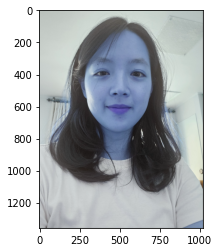

In [6]:
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

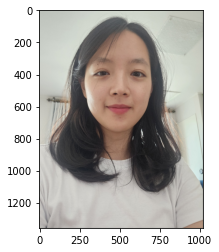

In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [8]:
detector_hog = dlib.get_frontal_face_detector()

In [9]:
dlib_rects = detector_hog(img_rgb, 1) #얼굴 탐지기 사각형

In [10]:
print(dlib_rects)

rectangles[[(233, 233) (788, 788)]]


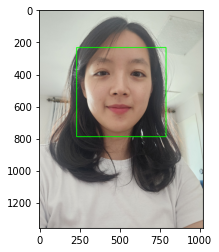

In [11]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
    

In [12]:
print(l,t,r,b)

233 233 788 788


In [13]:
model_path = './models/shape_predictor_68_face_landmarks.dat' #상대경로

In [14]:
landmark_predictor = dlib.shape_predictor(model_path)

In [15]:
list_landmarks = []  

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))


68


In [16]:
list_landmarks

[[(283, 403),
  (283, 460),
  (292, 516),
  (300, 573),
  (318, 626),
  (348, 673),
  (389, 713),
  (436, 743),
  (488, 756),
  (540, 748),
  (588, 722),
  (628, 683),
  (657, 637),
  (677, 586),
  (689, 531),
  (699, 477),
  (702, 420),
  (325, 337),
  (352, 307),
  (391, 299),
  (432, 304),
  (471, 322),
  (543, 329),
  (579, 310),
  (621, 307),
  (657, 322),
  (678, 357),
  (505, 382),
  (505, 418),
  (506, 453),
  (506, 490),
  (458, 530),
  (480, 536),
  (503, 543),
  (526, 538),
  (548, 533),
  (360, 399),
  (383, 385),
  (410, 384),
  (439, 401),
  (411, 406),
  (383, 407),
  (566, 405),
  (595, 388),
  (623, 390),
  (647, 406),
  (622, 413),
  (593, 411),
  (410, 601),
  (448, 594),
  (479, 585),
  (500, 591),
  (518, 586),
  (545, 596),
  (576, 608),
  (544, 632),
  (517, 642),
  (496, 643),
  (474, 639),
  (446, 626),
  (423, 603),
  (478, 609),
  (499, 612),
  (518, 609),
  (562, 608),
  (517, 611),
  (498, 613),
  (477, 609)]]

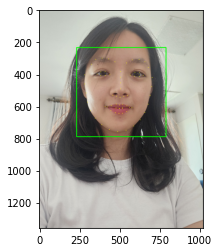

In [17]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [18]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[2]) #실험해서 찾은 값 2
    x = landmark[2][0] 
    y = landmark[2][1] - dlib_rect.height()//2
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(292, 516)
(x,y) : (292,238)
(w,h) : (556,556)


In [19]:
sticker_path = "./images/cat_whiskers.png"

In [20]:
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

(556, 556, 4)


In [21]:
refined_x = x - w //2
refined_y = y
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (14,238)


In [22]:
if sticker_img.shape[2] == 4: #rgb로 다 이루어진 스티커라면
    sticker_alpha = sticker_img[:, :, 3] / 255.0
    sticker_rgb = sticker_img[:, :, :3]
else:
    sticker_alpha = np.ones(sticker_img.shape[:2], dtype=float)
    sticker_rgb = sticker_img

In [23]:
y1, y2 = max(0, y), min(img_show.shape[0], y + h)
x1, x2 = max(0, x), min(img_show.shape[1], x + w)

In [24]:
sticker_alpha = sticker_alpha[:y2-y1, :x2-x1]
sticker_rgb = sticker_rgb[:y2-y1, :x2-x1]

In [25]:
roi = img_show[y1:y2, x1:x2]

In [26]:
if roi.shape[2] == 3: #만약 이미지가 세 개의 색상 채널을 가지고 있다면!
    for c in range(0,3):
        roi[:,:,c] = (sticker_alpha*sticker_rgb[:,:,c]+(1-sticker_alpha)*roi[:,:,c]) #알파 채널을 사용하여 픽셀별로 혼합
else:
    print(f"ROI shape is not as expected: {roi.shape}")
img_show[y1:y2, x1:x2] = roi

In [27]:
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]
sticker_area = np.where(sticker_img[:, :, 3] == 255, sticker_area, sticker_img).astype(np.uint8)

ValueError: operands could not be broadcast together with shapes (556,556) (556,556,3) (556,556,4) 

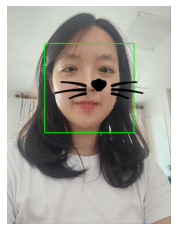

In [28]:
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # 축 숨기기
plt.show()

In [29]:
#여러 각도의 사진들 불러오기

my_images = []

my_image_path1, my_image_path2, my_image_path3 = "./images/seowoo_side.jpg","./images/seowoo_side_side.jpg", "./images/seowoo_distance.jpg"  
my_images = [my_image_path1,my_image_path2,my_image_path3]

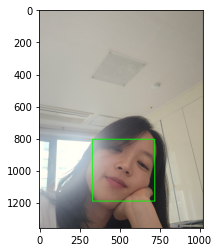

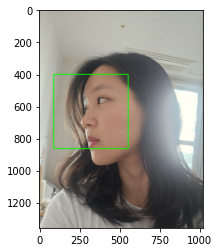

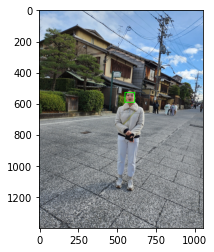

In [30]:
for image in my_images:
    img_bgr = cv2.imread(image)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    
        cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)

    plt.imshow(img_rgb)
    plt.show()

##회고

- 왜 np.where가 안되지? ㅠㅠ 이따가 찾아봐야겠다. 
- 그리고 나는 얼굴 각도에 따라 얼굴은 잘 찾았는데 자세히 보면 점이 안보인다. 얼굴 자체는 인식하지만 요소는 잘 못찾는거 같다. 